In [18]:
!pip install underthesea
import urllib.request
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import pandas as pd
from underthesea import word_tokenize
import numpy as np



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Load data from crawler file
df = pd.read_csv("/content/drive/MyDrive/btth3/data - data.csv")
df.head()

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN


In [21]:
tweet_df = df[['comment','label']]
tweet_df = tweet_df[tweet_df['label'] != 'NEU']
print(tweet_df.shape)
tweet_df

(26762, 2)


,comment,label
0,Áo bao đẹp ạ!!,POS
1,Tuyệt vời !,POS
2,2day ao khong giong trong.,NEG
3,"Mùi thơm,bôi lên da mềm da.",POS
4,"Vải đẹp, dày dặn.",POS
...,...,...
31455,Không đáng tiền.,NEG
31456,Quần rất đẹp.,POS
31457,Hàng đẹp đúng giá tiền.,POS
31458,Chất vải khá ổn.,POS


In [22]:
yt = tweet_df['label']
yt

0        POS
1        POS
2        NEG
3        POS
4        POS
        ... 
31455    NEG
31456    POS
31457    POS
31458    POS
31459    POS
Name: label, Length: 26762, dtype: object

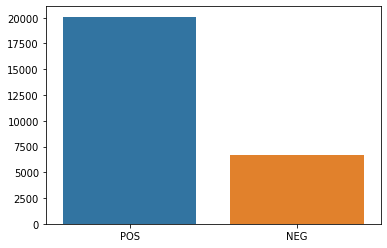

In [23]:
import seaborn as sns
dd = pd.Series(yt).value_counts()
sns.barplot(x=np.array(['POS','NEG']),y=dd.values)
plt.show()

In [ ]:
dd

POS    20093
NEG     6669
NEU     4698
Name: label, dtype: int64

In [ ]:
yt.shape

(26762,)

In [24]:
sentiment_label = tweet_df.label.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 0, 0]), Index(['POS', 'NEG'], dtype='object'))

In [25]:
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)
    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip()
    return row

In [26]:
dt = tweet_df.comment.apply(standardize_data)
dt.head()

0                  Áo bao đẹp ạ
1                     Tuyệt vời
2     2day ao khong giong trong
3    Mùi thơm bôi lên da mềm da
4              Vải đẹp  dày dặn
Name: comment, dtype: object

In [27]:
tweet = dt.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(tokenizer.word_index)

{'rất': 1, 'sản': 2, 'phẩm': 3, 'đẹp': 4, 'chất': 5, 'shop': 6, 'hàng': 7, 'lượng': 8, 'giao': 9, 'tuyệt': 10, 'vời': 11, 'và': 12, 'áo': 13, 'gói': 14, 'đóng': 15, 'tốt': 16, 'nhanh': 17, 'tiền': 18, 'chắc': 19, 'chắn': 20, 'đáng': 21, 'vụ': 22, 'phục': 23, 'gian': 24, 'thời': 25, 'vải': 26, 'nhưng': 27, 'hình': 28, 'mua': 29, 'lắm': 30, 'mặc': 31, 'hơi': 32, 'mình': 33, 'màu': 34, 'ko': 35, 'giá': 36, 'có': 37, 'k': 38, 'như': 39, 'ok': 40, 'quá': 41, 'không': 42, 'mà': 43, 'thì': 44, 'là': 45, 'với': 46, 'được': 47, 'cho': 48, 'sẽ': 49, 'hộ': 50, 'luôn': 51, 'ủng': 52, 'bị': 53, 'ạ': 54, 'lại': 55, 'nên': 56, 'ưng': 57, 'tình': 58, 'giống': 59, 'quần': 60, 'nhiệt': 61, '1': 62, 'cũng': 63, 'hơn': 64, 'size': 65, 'dài': 66, 'kém': 67, 'mỏng': 68, 'lần': 69, 'nữa': 70, 'vừa': 71, 'còn': 72, 'sp': 73, 'cái': 74, 'thích': 75, 'sao': 76, 'này': 77, 'đặt': 78, 'rộng': 79, 'ý': 80, 'đc': 81, 'y': 82, 'nhận': 83, 'chủ': 84, 'đúng': 85, 'đã': 86, 'so': 87, 'của': 88, '2': 89, 'dễ': 90, 'khá'

In [28]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           210112    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 226,763
Trainable params: 226,763
Non-trainable params: 0
________________________________________________

In [ ]:
pip install pydot

In [ ]:
pip install graphviz

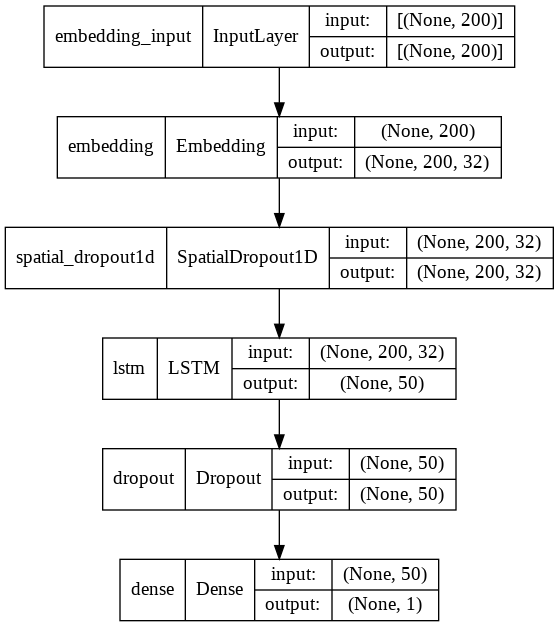

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
670/670 [==============================] - 151s 221ms/step - loss: 0.3115 - accuracy: 0.8671 - val_loss: 0.2295 - val_accuracy: 0.9103
Epoch 2/5
670/670 [==============================] - 147s 219ms/step - loss: 0.2052 - accuracy: 0.9248 - val_loss: 0.2126 - val_accuracy: 0.9180
Epoch 3/5
670/670 [==============================] - 147s 220ms/step - loss: 0.1815 - accuracy: 0.9350 - val_loss: 0.2069 - val_accuracy: 0.9225
Epoch 4/5
670/670 [==============================] - 147s 219ms/step - loss: 0.1651 - accuracy: 0.9402 - val_loss: 0.2072 - val_accuracy: 0.9208
Epoch 5/5
670/670 [==============================] - 147s 220ms/step - loss: 0.1595 - accuracy: 0.9423 - val_loss: 0.2093 - val_accuracy: 0.9210


In [ ]:
model.save('model.h5')

In [29]:
import tensorflow as tf
model1= tf.keras.models.load_model('model.h5')

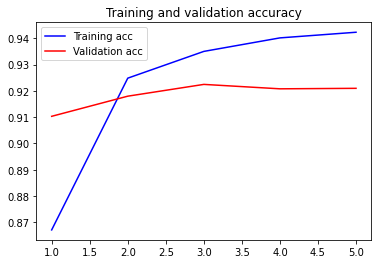

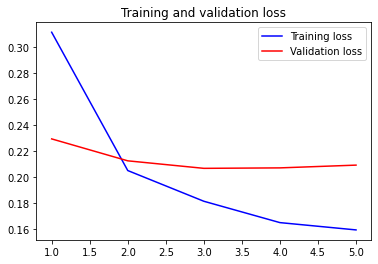

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [32]:
test_sentence1 = input("Nhập cmt:")
predict_sentiment(test_sentence1)

Nhập cmt:ok nha
Predicted label:  NEG
